#### Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm 

In [2]:
class_names = ["BUFFALO","CAT", "COW","DEER","DOG","ELEPHANT","FOX","FROG","HORSE","LION","MONKEY","PIG","RABBIT","SQUIRREI","TIGER"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes= len(class_names)

IMAGE_SIZE =(150,150)

#### Loarding the data

In [3]:
def load_data():
    """
    Loading data
    """ 
    
    datasets = ['c:/Users/user/Documents/DL/Class/Train', 'c:/Users/user/Documents/DL/Class/Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
    
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                # Append the image and its corresponding label to the lists
                images.append(image)
                labels.append(label)  # Append the label here, not inside the inner loop
            
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading c:/Users/user/Documents/DL/Class/Train


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.94it/s]


Loading c:/Users/user/Documents/DL/Class/Test


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 118.63it/s]


#### Let's explore the dataset

In [5]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 150
Number of testing examples: 80
Each image is of size: (150, 150)


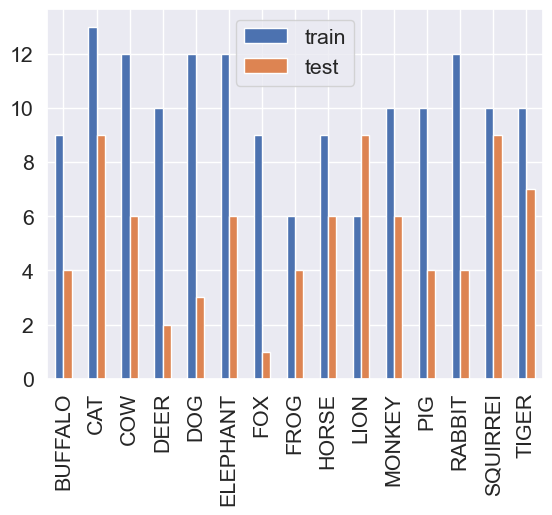

In [6]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)
pd.DataFrame({'train': train_counts,
             'test': test_counts},
             index = class_names
            ).plot.bar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

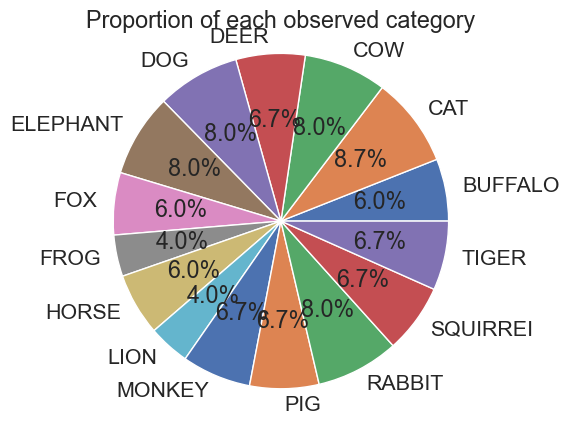

In [7]:
plt.pie(train_counts,
       explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
       labels=class_names,
       autopct ='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show

In [8]:
#Scale the data

train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
def display_random_image(class_names, images, labels):
    """
       Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{}:'.format(index)+ class_names[labels[index]])
    plt.show()

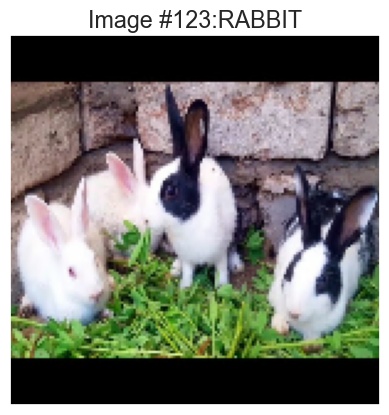

In [10]:
display_random_image(class_names,train_images, train_labels)

In [11]:
def display_random_image(class_names, images, labels):
    """
    Display 25 images from the images array and their corresponding labels from the labels array.
    """
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Some examples of images from the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)  # Use cmap=plt.cm.binary for grayscale images
        plt.xlabel(class_names[labels[i]])
    plt.show()

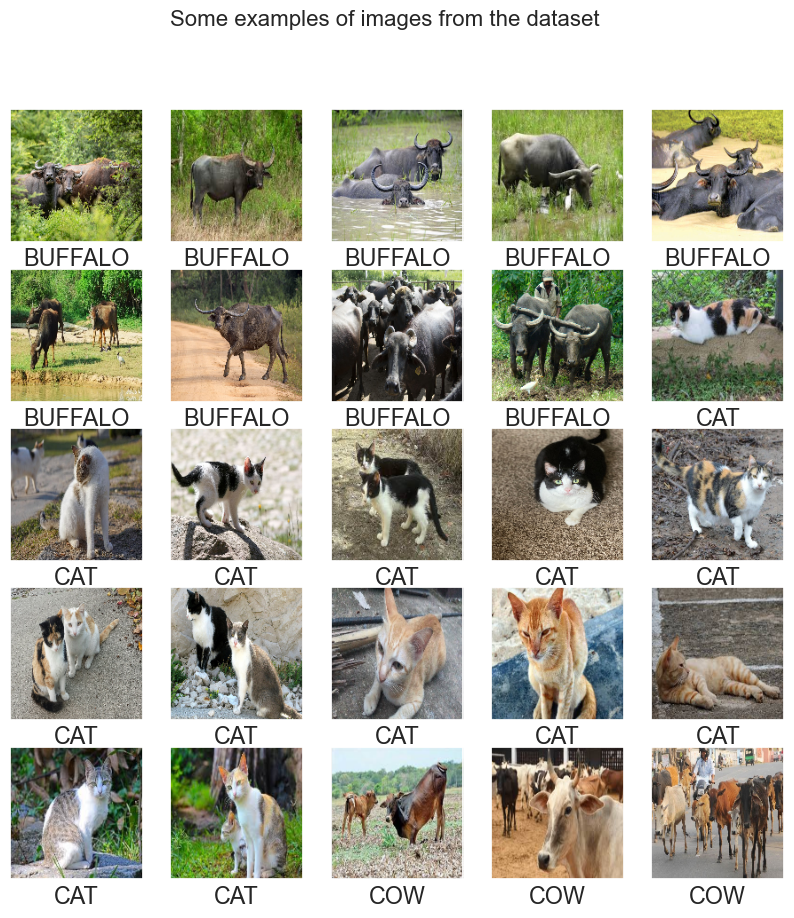

In [12]:
display_random_image(class_names,train_images, train_labels)